# Interpolación. Integración numérica: métodos del Trapacio y Simpson.

# Integración numérica. Longitud de curvas.

### Ejercicio 22.- Calcular la longitud de la curva catenaria $$y=\dfrac{a}{2}(e^{x/a}+e^{-x/a})$$ con $a=11$ comprendida entre $x_0=0 $ y $x_1=15$, utilizando el método del trapecio con error absoluto menor que $10^{−3}$.

SOLUCIÓN

Recordad que la longitud de una curva $y=f(x)$ es  $$L =\int_a^b\sqrt{1+|f'(x)|^2}dx.$$

Por tanto, comenzamos definiendo la función.

In [1]:
#la curva dada es :
a=11
f(x)=a/2*(exp(x/11)+exp(-x/11))
show(f)

x |--> 11/2*e^(1/11*x) + 11/2*e^(-1/11*x)

Nota: La <strong>catenaria</strong> es una curva que viene definida por $a·\cosh(x/a)$, donde $\cosh$ es el coseno hiperbólico. En general, $$\cosh(x)=\dfrac{e^{x}+e^{-x}}{2}.$$ También se define el seno hiperbólico como: $$\sinh(x)=\dfrac{e^{x}-e^{-x}}{2}.$$ Se puede comprobar fácilmente que una es derivada de la otra. También se puede comprobar que $$\cosh^2(x)-\sinh^2(x)=1$$

La longitud que se quiere calcular es : 

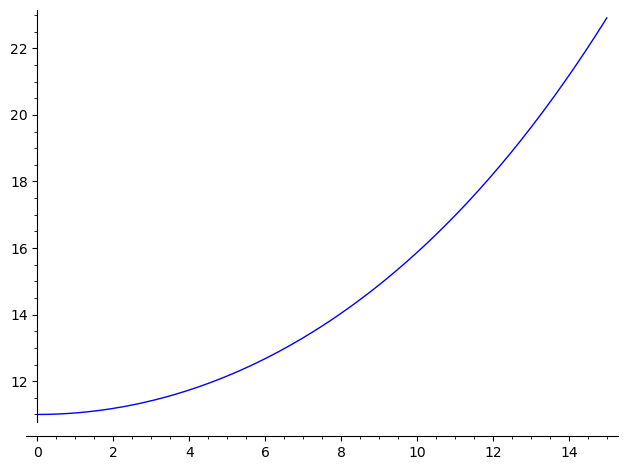

In [2]:
plot(f,x,0,15)

Recordad que la longitud de una curva y=f(x) es  $$L =\int_a^b\sqrt{1+|f'(x)|^2}dx,$$
por lo que se pide es aproximar la integral de la siguiente función:

$$\sqrt{1+|f'(x)|^2}=\sqrt{1+a^2·(\cosh'(x/a))^{2}·(1/a^2)}=\sqrt{1+(\sinh(x/a))^2}=\sqrt{\cosh^2(x/a)}=\cosh(x/a).$$

También podemos derivar la función $f(x)=\dfrac{a}{2}(e^{x/a}+e^{-x/a})$ directamente. En este caso,

$$\sqrt{1+|f'(x)|^2}=\sqrt{1+(\dfrac{a}{2}(e^{x/a}-e^{-x/a}))^{2}·\dfrac{1}{a^2}}=\sqrt{1+\dfrac{(e^{x/a}-e^{-x/a})^2}{4}}=\sqrt{\dfrac{4+e^{2x/a}+e^{-2x/a}-2e^{0}}{4}}=\dfrac{\sqrt{(e^{x/a}+e^{-x/a})^2}}{2}= \dfrac{e^{x/a}+e^{-x/a}}{2}$$

Por lo tanto, la integral que hay que aproximar es:

$$L =\int_0^{15}\cosh(x/11)dx \text{ , o bien, } L =\int_0^{15}\dfrac{e^{x/11}+e^{-x/11}}{2}dx$$

Podemos apreciar el mismo resultado usando SAGE:

In [3]:
integrate(sqrt(1+diff(f,x)^2),x,0,15).n()

20.1006184980332

In [4]:
integrate(cosh(x/11) ,x,0,15).n()

20.1006184980332

Así, el área que nos da la longitud es gráficamente:

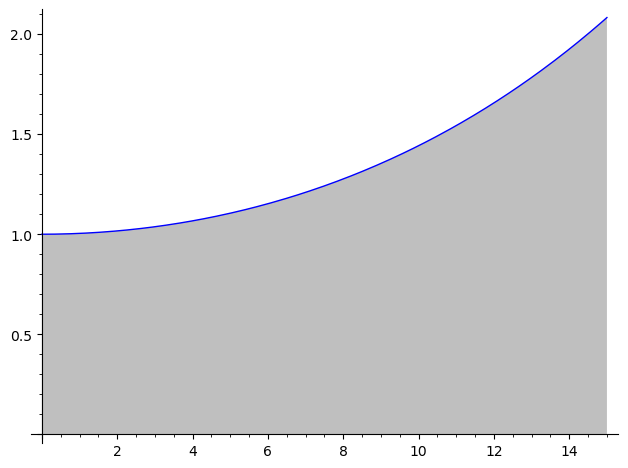

In [5]:
plot(cosh(x/11) ,x,0,15 ,fill=true)

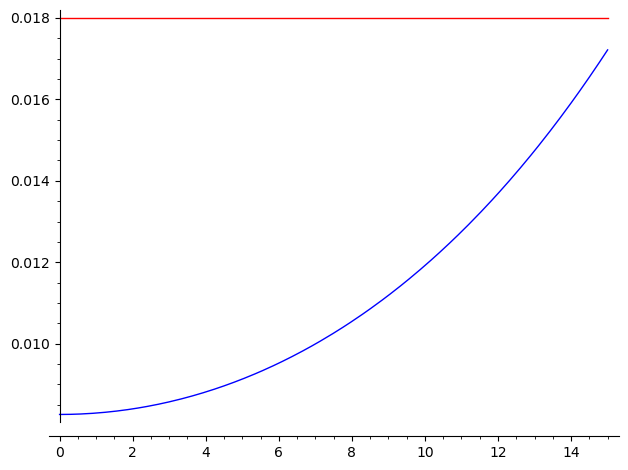

In [6]:
g(x)=cosh(x/11)
a=0
b=15
plot(abs(derivative(g(x),x,2)),(x,0,b))+plot(0.018,a,b,color='red')

Calculemos el $n$ al que debemos hacer la aproximación de la integral.

Dada una constante M de forma que $|g''(x)|\leq M$ para todo $x\in [a,b]$. 
$$\displaystyle \left| {\rm Trapecio}_{n}(g)-\int_a^b g(x) \, dx\right| \leq \dfrac{(b-a)^3}{12\cdot n^2}\cdot M $$

In [7]:
M=0.018;
epsilon=10^(-3);
n=1
while (b-a)^3*M/(12*n^2)>epsilon:
    n=n+1

In [8]:
n

72

En el método del Trapecio subdividimos el intervalo $[a,b]$ con los siguientes nodos: $$x_k=a+k\cdot \frac{b-a}{n}$$ para $k=0,1,\dots,n$.

La fórmula del Método del Trapecio nos aproxima la integral de la siguiente forma:
<p>$$\displaystyle \int_a^b  {g(x)} \, dx \ \approx {\rm Trapecio}_{n}(g)=\dfrac{b-a}{2n}\Bigl(g(a)+2g(x_1)+\dots+2g(x_{n-1})+g(b)\Bigr)$$</p>

In [9]:
X=[a+k*(b-a)/n for k in range(0,n+1)]

In [10]:
trapecio=(b-a)/(2*n)*(g(a)+2*sum(g(X[k]) for k in range(1,n))+g(b))
numerical_approx( trapecio)

20.1012193365059